In [1]:
from settings import *


random_rho0s: setting seed=78520


In [2]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

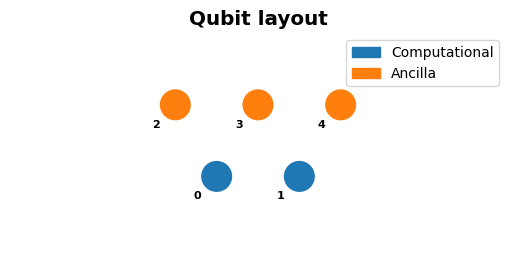

In [3]:
qubits.show_layout()

In [4]:
qubits.gate_connections

[GateConnection(id1=0, id2=1, d=0.9),
 GateConnection(id1=0, id2=2, d=0.9),
 GateConnection(id1=0, id2=3, d=0.9),
 GateConnection(id1=1, id2=3, d=0.9),
 GateConnection(id1=1, id2=4, d=0.9),
 GateConnection(id1=2, id2=3, d=0.9),
 GateConnection(id1=3, id2=4, d=0.9000000000000001)]

In [5]:
# theta_init = np.load("both_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=500, n_grad=10)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=6998


C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.028303561234177543 
            Current gradient: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00332591  0.          0.
  0.00302627  0.          0.          0.          0.          0.
  0.         -0.00123235  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01556509  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00020443  0.          0.          0.          0.      

In [7]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

In [8]:
theta_opt

array([0.99494048, 0.89336331, 1.        , 1.        , 1.        ,
       1.63089479, 1.62313717, 0.80365643, 0.62272345, 0.80804734,
       0.99382051, 0.76341594, 1.36824626, 1.05023496, 1.53419555,
       1.19299339, 0.94298823, 1.04440365, 1.65667386, 1.037835  ,
       1.63745947, 1.06279639, 0.73711249, 1.04923176, 0.90650028,
       1.02016824, 0.8379463 , 1.12752637, 1.06880921, 1.00307166,
       0.84918867, 0.57072004, 1.02016333, 0.66591014, 1.05850631,
       1.05986113, 1.2660077 , 1.0111602 , 1.07345804, 1.07145   ,
       1.15962407, 0.9786187 , 0.89682884, 0.94924709, 1.21592341,
       1.35380284, 1.31290554, 1.14306554, 0.73965567, 0.75909262,
       1.20236741, 1.12766851, 1.2797719 , 1.06937324, 0.96504397,
       1.00339817, 0.95363949, 1.04959726, 0.95432598, 1.14106295,
       1.14878781, 0.86212985, 1.30006087, 0.97105828, 1.13563216,
       1.02956068, 1.25046573, 0.97341976, 1.01979918, 1.27448749,
       1.41423353, 0.74721824, 1.06856778, 0.73628292, 1.06862

c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

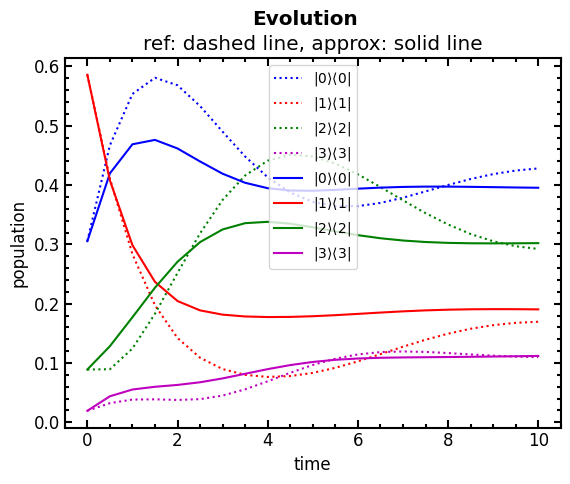

In [9]:
rho0 = rho_rand_haar(m, 5)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(20, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=20, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

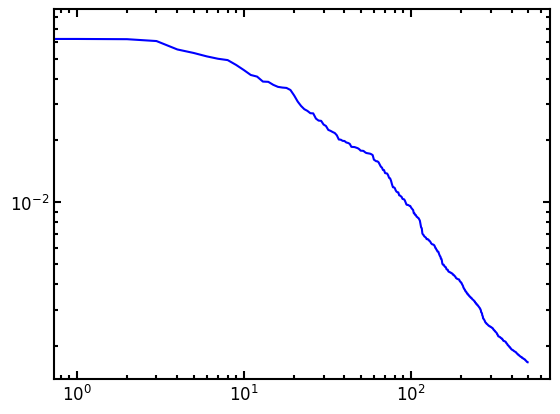

In [10]:
plt.loglog(errors)